# Intensity distribution

In this notebook we conduct measurements with the photodiode and different constellations of the acousto-optic deflectors.

Thorlabs photodiode is set to 50dB.

In [1]:
datadir = '../../dataset/intensity'
figuredir = '../../figure/intensity/distribution'

T = 260e-3
f0 = 80e6
f1 = 120e6

os.makedirs(figuredir, exist_ok=True)

In [24]:
def to_intensity_matrix(df):
    df = df[(df.time > 0) & (df.time < T)]
    df['frequency'] = f0 + (f1 - f0) * df.time / T

    U = [float(c.split('@')[-1]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix2(df):
    df = df[(df.time > 0) & (df.time < T)]
    df['frequency'] = f0 + (f1 - f0) * df.time / T

    U = [float(c.split('@')[-1].split('%')[0]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix3(df):
    df = df[(df.time > 0) & (df.time < T)]
    df['frequency'] = f0 + (f1 - f0) * df.time / T

    U = [float(c.split('@')[-1].split('MHz')[0])*1e6 for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

In [3]:
hh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_horizontal_socket')
hv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_vertical_socket')
vh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_horizontal_socket')
vv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_vertical_socket')

hh_f, hh_U, hh_I = to_intensity_matrix(hh)
hv_f, hv_U, hv_I = to_intensity_matrix(hv)
vv_f, vv_U, vv_I = to_intensity_matrix(vv)
vh_f, vh_U, vh_I = to_intensity_matrix(vh)

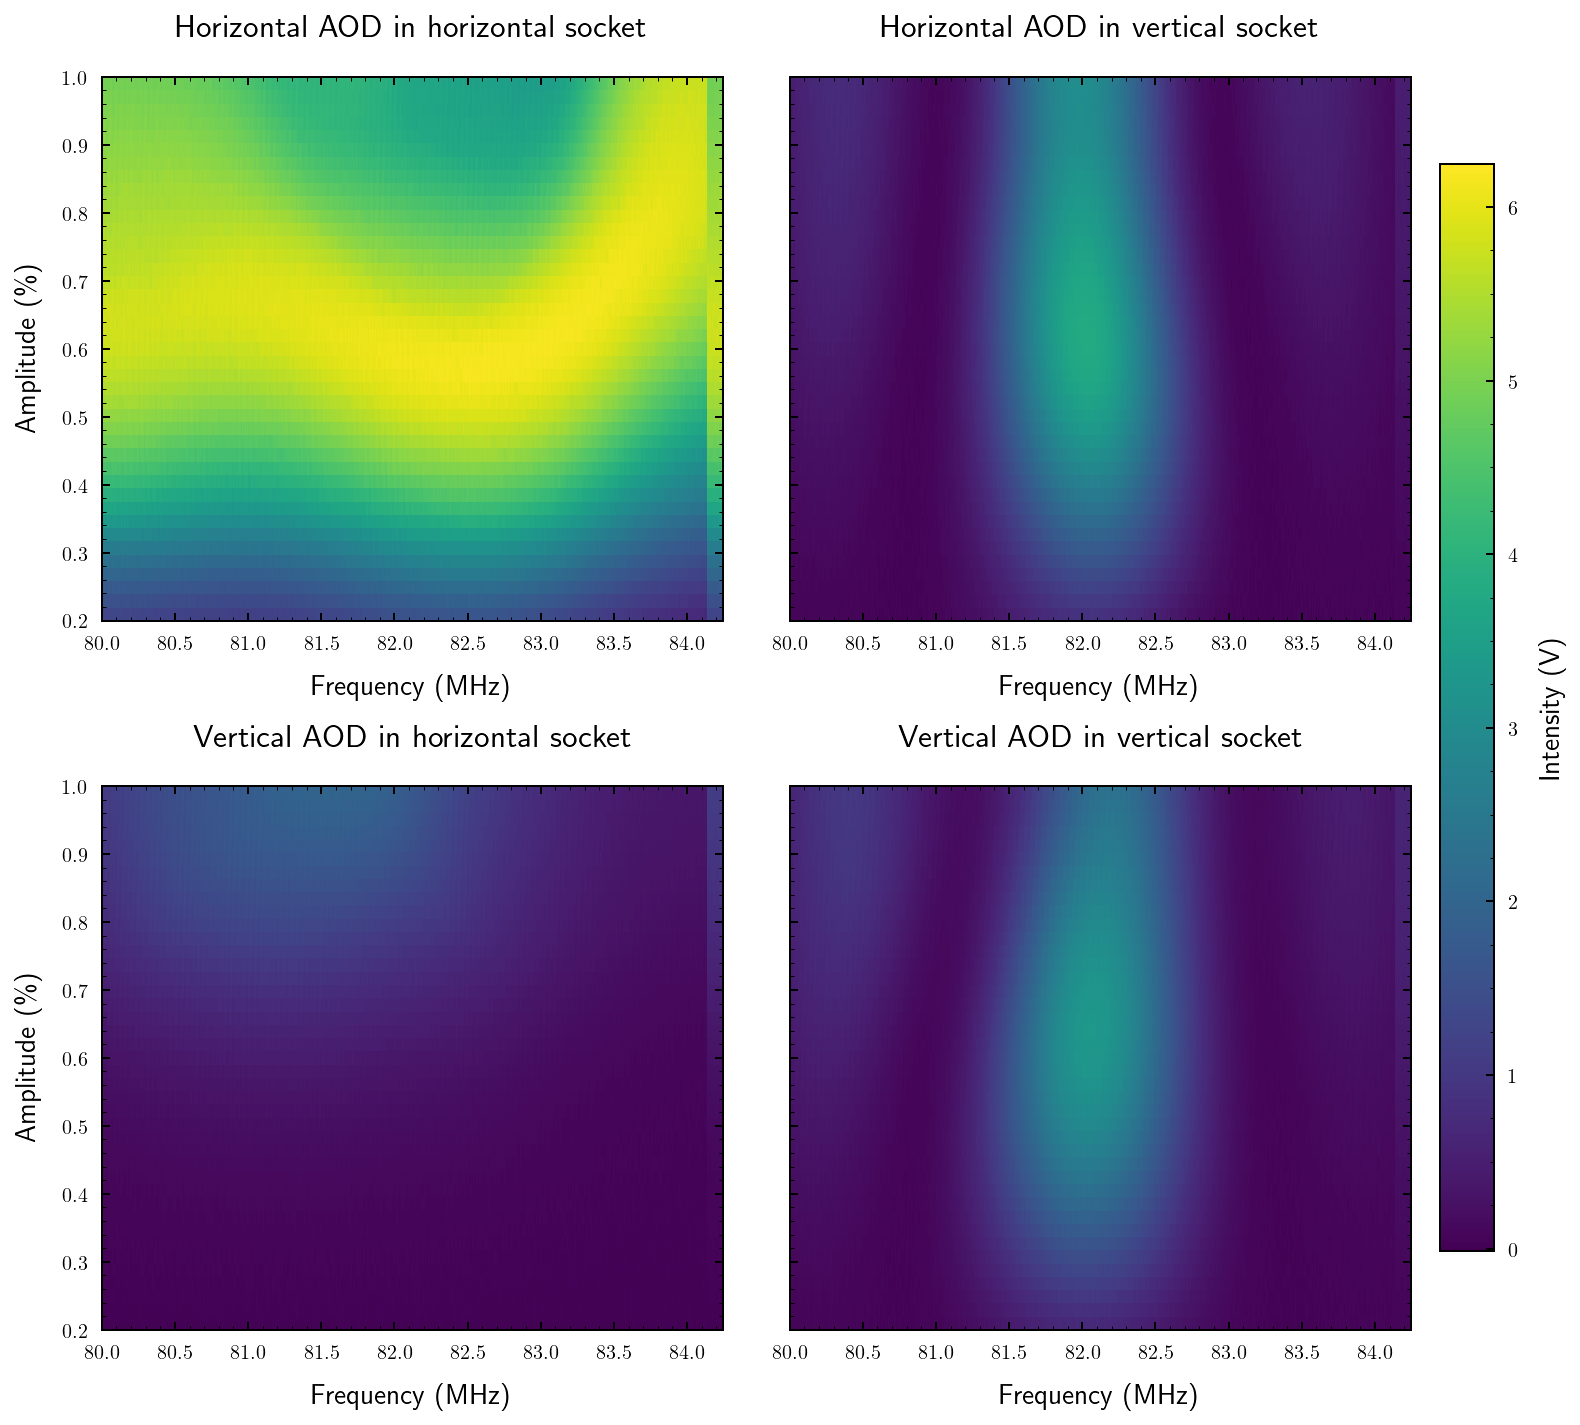

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

vmin = np.min([hh_I.min(), hv_I.min(), vh_I.min(), vv_I.min()])
vmax = np.max([hh_I.max(), hv_I.max(), vh_I.max(), vv_I.max()])

axes = axes.flatten()

axes[0].set_title('Horizontal AOD in horizontal socket')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(hh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hh_f.min() / 1e6, hh_f.max() / 1e6, hh_U.min(), hh_U.max()])

axes[1].set_title('Horizontal AOD in vertical socket')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(hv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hv_f.min() / 1e6, hv_f.max() / 1e6, hv_U.min(), hv_U.max()])

axes[2].set_title('Vertical AOD in horizontal socket')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(vh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[vh_f.min() / 1e6, vh_f.max() / 1e6, vh_U.min(), vh_U.max()])

axes[3].set_title('Vertical AOD in vertical socket')
axes[3].set_xlabel('Frequency (MHz)')
im = axes[3].imshow(np.rot90(vv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[vv_f.min() / 1e6, vv_f.max() / 1e6, vv_U.min(), vv_U.max()])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)')
fig.tight_layout()
fig.savefig(os.path.join(figuredir, 'unpaired-amplitude.pdf'), )

plt.show()

In [8]:
a_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'hsweep')
a_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'vsweep')

a_hsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'hsweep')
a_vsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'vsweep')

ah_f, ah_U, ah_I = to_intensity_matrix2(a_hsweep)
av_f, av_U, av_I = to_intensity_matrix2(a_vsweep)
aeh_f, aeh_U, aeh_I = to_intensity_matrix2(a_hsweep_ex)
aev_f, aev_U, aev_I = to_intensity_matrix2(a_vsweep_ex)

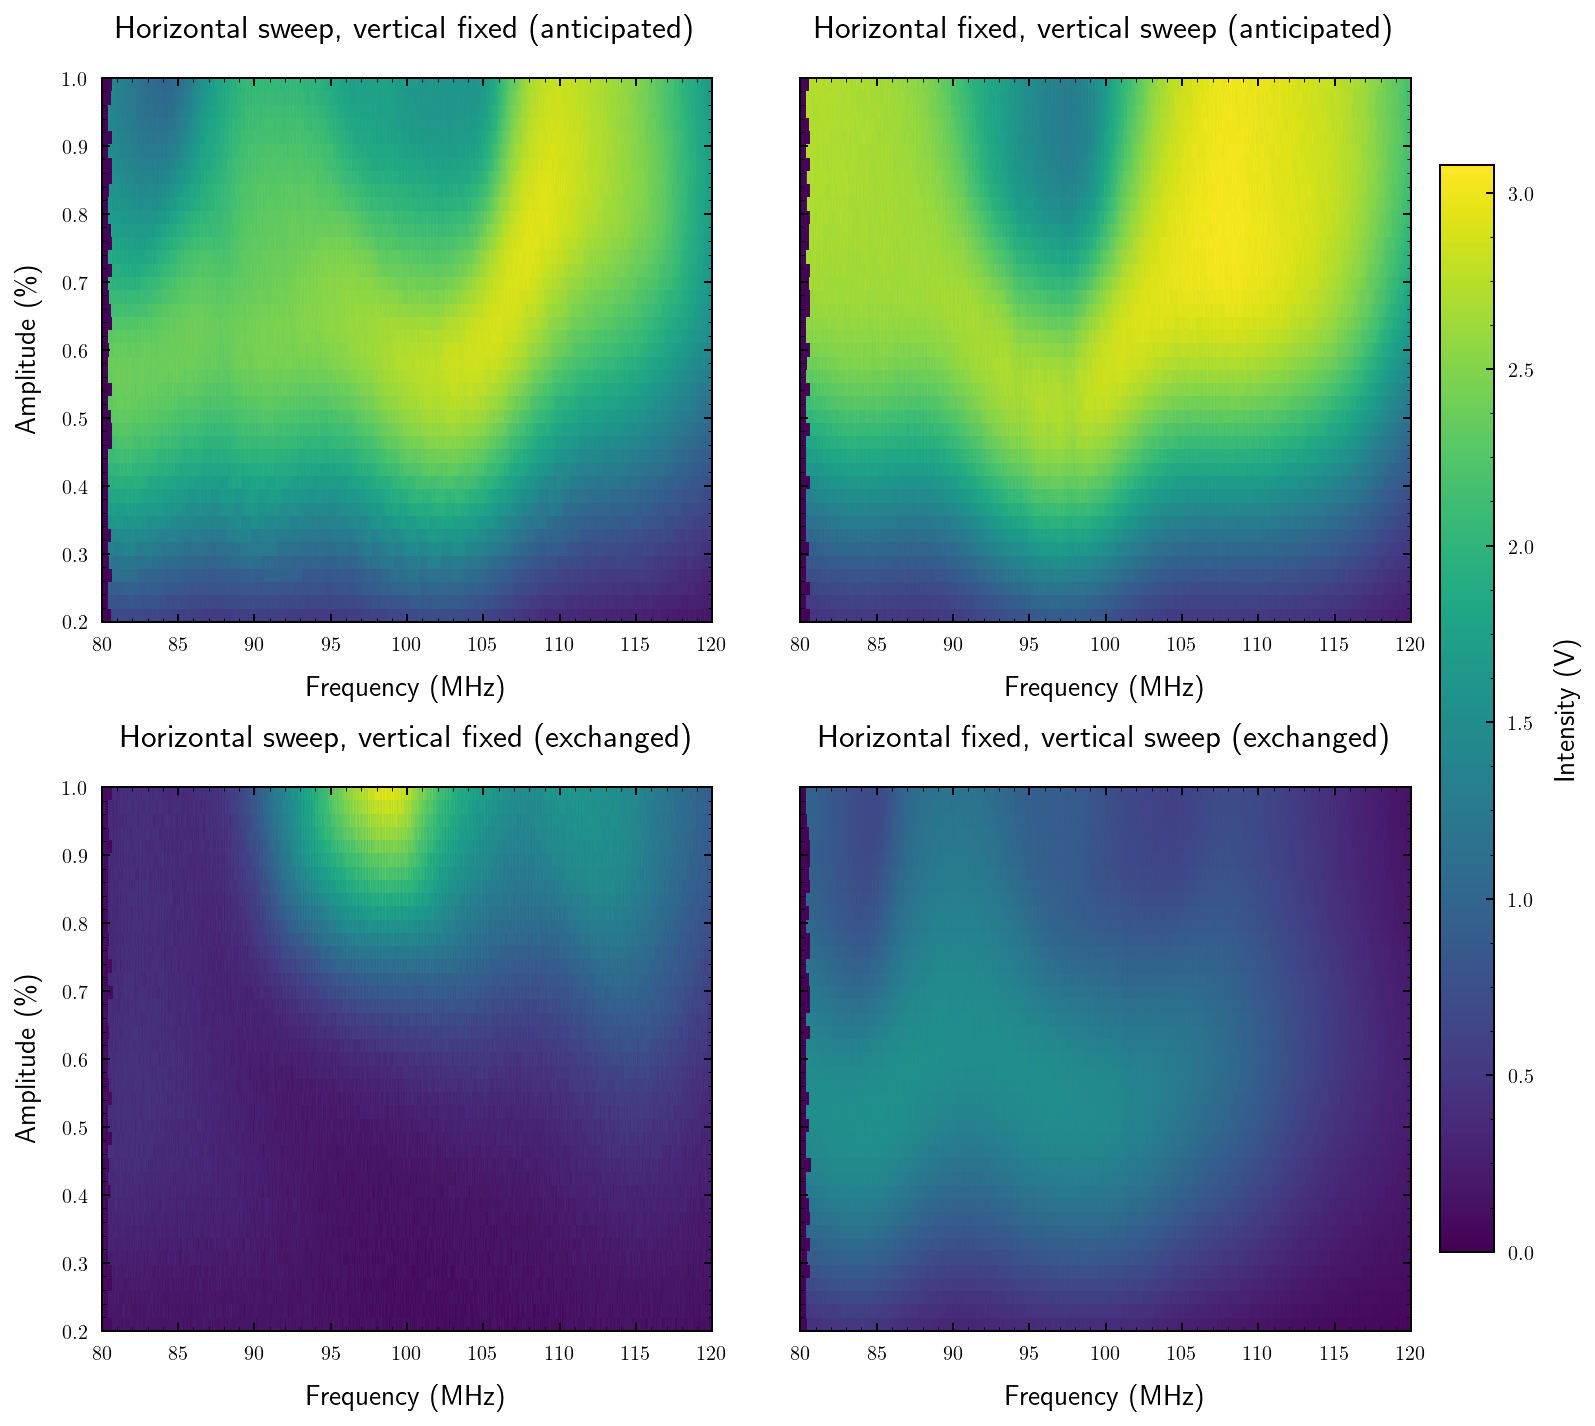

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

vmin = np.min([ah_I.min(), av_I.min(), aeh_I.min(), aev_I.min()])
vmax = np.max([ah_I.max(), av_I.max(), aeh_I.max(), aev_I.max()])

axes = axes.flatten()

axes[0].set_title('Horizontal sweep, vertical fixed (anticipated)')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(ah_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[ah_f.min() / 1e6, ah_f.max() / 1e6, ah_U.min(), ah_U.max()])

axes[1].set_title('Horizontal fixed, vertical sweep (anticipated)')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(av_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[av_f.min() / 1e6, av_f.max() / 1e6, av_U.min(), av_U.max()])

axes[2].set_title('Horizontal sweep, vertical fixed (exchanged)')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(aeh_I), aspect='auto',# vmin=vmin, vmax=vmax,
    extent=[aeh_f.min() / 1e6, aeh_f.max() / 1e6, aeh_U.min(), aeh_U.max()])

axes[3].set_title('Horizontal fixed, vertical sweep (exchanged)')
axes[3].set_xlabel('Frequency (MHz)')
im = axes[3].imshow(np.rot90(aev_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[aev_f.min() / 1e6, aev_f.max() / 1e6, aev_U.min(), aev_U.max()])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)')
fig.tight_layout()
fig.savefig(os.path.join(figuredir, 'paired-amplitude.pdf'))

plt.show()

In [13]:
ra = pd.read_csv('../../dataset/intensity/sample-frequency.csv')

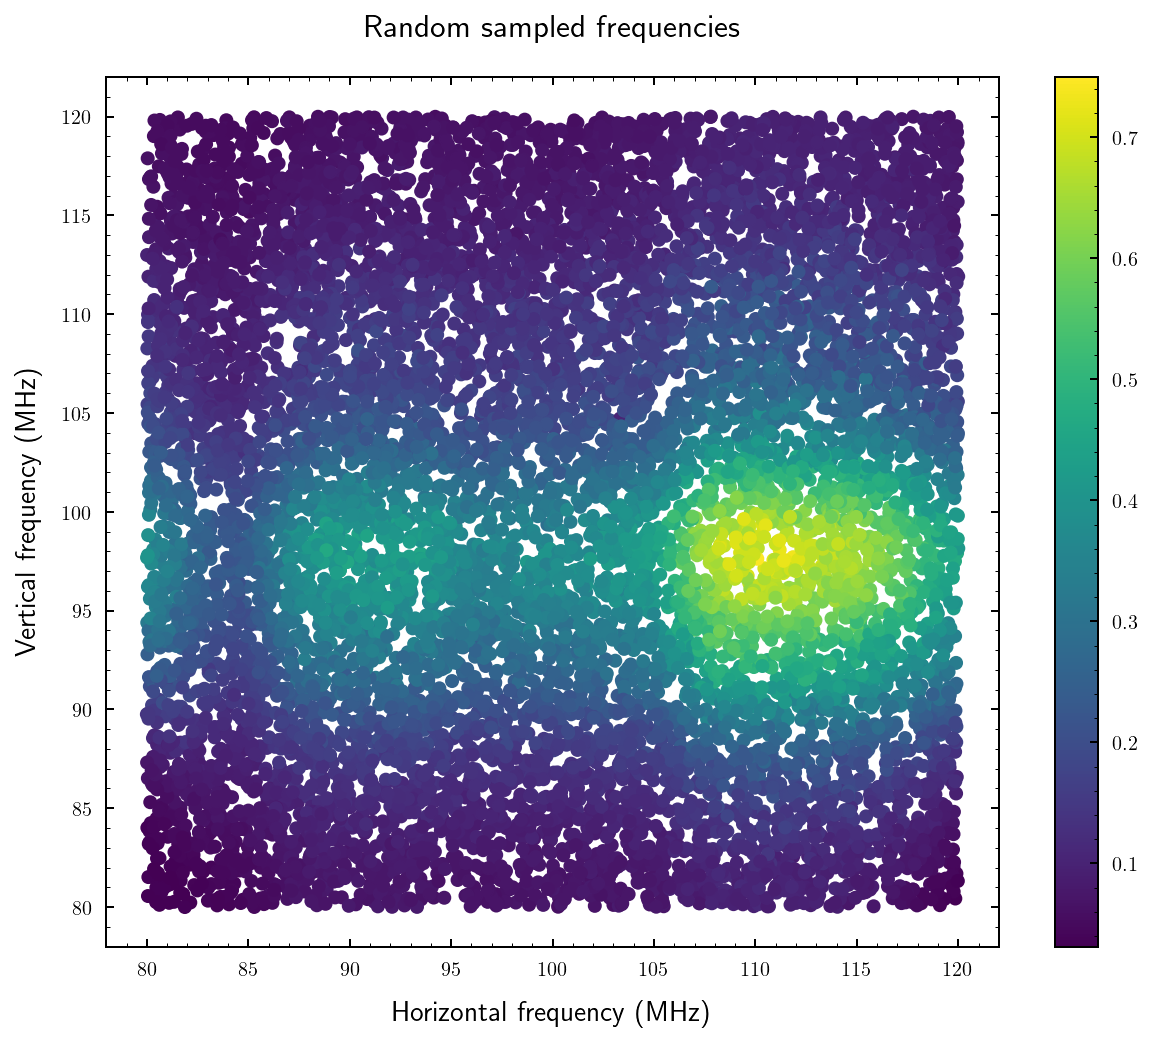

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(ra.hfrequency / 1e6, ra.vfrequency / 1e6, c=ra.voltage)
plt.title('Random sampled frequencies')
plt.xlabel('Horizontal frequency (MHz)')
plt.ylabel('Vertical frequency (MHz)')
plt.colorbar()
fig.savefig(os.path.join(figuredir, 'sample-frequency.pdf'))
plt.show()

In [25]:
f_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'hsweep')
f_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'vsweep')

fh_f, fh_U, fh_I = to_intensity_matrix3(f_hsweep)
fv_f, fv_U, fv_I = to_intensity_matrix3(f_vsweep)

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

vmin = np.min([fh_I.min(), fv_I.min()])
vmax = np.max([fh_I.max(), fv_I.max()])

axes[0].set_title('Horizontal sweep, vertical fixed')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(fh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fh_f.min() / 1e6, fh_f.max() / 1e6, fh_U.min(), fh_U.max()])

axes[1].set_title('Horizontal fixed, vertical sweep')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(av_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fv_f.min() / 1e6, fv_f.max() / 1e6, fv_U.min(), fv_U.max()])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)')
fig.tight_layout()
fig.savefig(os.path.join(figuredir, 'paired-frequency.pdf'))

plt.show()